In [1]:
import rdflib
from rdflib import URIRef, Literal, Graph

In [2]:
from rdflib import Graph, Namespace
from rdflib.namespace import RDF, RDFS
import io
import pydotplus
from IPython.display import display, Image
from rdflib.tools.rdf2dot import rdf2dot
import pandas as pd


def visualize(g):
    stream = io.StringIO()
    rdf2dot(g, stream, opts = {display})
    dg = pydotplus.graph_from_dot_data(stream.getvalue())
    png = dg.create_png()

    display(Image(png))

def t2rdflibg(triples): #triples to rdflib graph
    g = Graph()
    for t in triples:
        g.add(t)
    return g


In [3]:
serial_g = Graph()
serial_g.parse("Serialization.owl", format="xml")
#serial_g.parse("datamodels_rdf.owl", format="xml")
serial_g.parse("EntityAttributeRecord.rdf", format="xml")

<Graph identifier=N17ebb4b78407441293dda3f20dbed7db (<class 'rdflib.graph.Graph'>)>

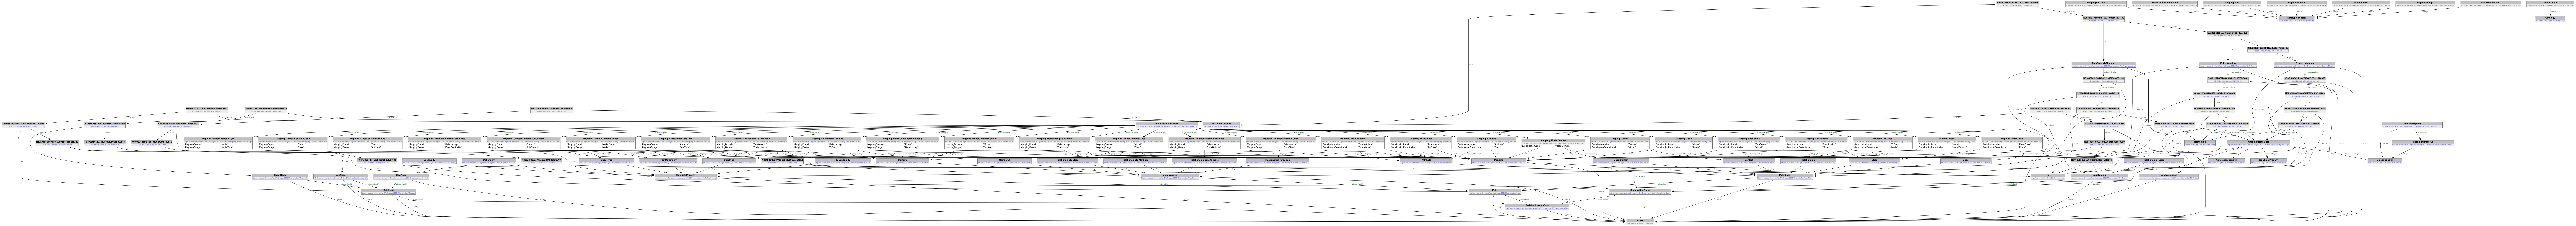

In [4]:
visualize(serial_g)

In [5]:
# Find all classes in the Serialization Specification that are subclasses of Meta
list(serial_g.query("""
PREFIX dm:<http://www.semanticweb.org/tomk/ontologies/2022/9/datamodel#> 
PREFIX ser:<http://www.semanticweb.org/tomk/ontologies/2022/11/serialization#> 
PREFIX rdfs:<http://www.w3.org/2000/01/rdf-schema#> 
select ?s ?type {
?s a ?type.
FILTER (?type in (?meta_sub_class) ).
?meta_sub_class rdfs:subClassOf+ ser:Meta.
}
ORDER BY ?type"""))

[(rdflib.term.URIRef('http://www.semanticweb.org/tomk/ontologies/2022/9/datamodel#Model'),
  rdflib.term.URIRef('http://www.semanticweb.org/tomk/ontologies/2022/11/serialization#MetaClass')),
 (rdflib.term.URIRef('http://www.semanticweb.org/tomk/ontologies/2022/9/datamodel#Relationship'),
  rdflib.term.URIRef('http://www.semanticweb.org/tomk/ontologies/2022/11/serialization#MetaClass')),
 (rdflib.term.URIRef('http://www.semanticweb.org/tomk/ontologies/2022/9/datamodel#Context'),
  rdflib.term.URIRef('http://www.semanticweb.org/tomk/ontologies/2022/11/serialization#MetaClass')),
 (rdflib.term.URIRef('http://www.semanticweb.org/tomk/ontologies/2022/9/datamodel#Attribute'),
  rdflib.term.URIRef('http://www.semanticweb.org/tomk/ontologies/2022/11/serialization#MetaClass')),
 (rdflib.term.URIRef('http://www.semanticweb.org/tomk/ontologies/2022/9/datamodel#ModelDomain'),
  rdflib.term.URIRef('http://www.semanticweb.org/tomk/ontologies/2022/11/serialization#MetaClass')),
 (rdflib.term.URIRef(

In [8]:
# Find all Mapping Instances in the Serialization Specification
%timeit
mappings_df = pd.DataFrame(serial_g.query("""
PREFIX dm:<http://www.semanticweb.org/tomk/ontologies/2022/9/datamodel#> 
PREFIX ser:<http://www.semanticweb.org/tomk/ontologies/2022/11/serialization#> 
PREFIX rdfs:<http://www.w3.org/2000/01/rdf-schema#> 
select ?mapping ?m_target ?m_target_type ?m_sub_type ?m_label ?m_parent_label ?m_domain ?m_range {
?mapping a ?type.
FILTER (?type in (?m_types) ).
?m_types rdfs:subClassOf* ser:Mapping.
OPTIONAL { ?mapping ser:MappingMetaTarget ?m_target}
OPTIONAL { ?m_target rdf:type ?m_target_type}
OPTIONAL { ?mapping ser:SerializationLabel ?m_label}
OPTIONAL { ?mapping ser:SerializationParentLabel ?m_parent_label}
OPTIONAL { ?mapping ser:MappingSubType ?m_sub_type}
OPTIONAL { ?mapping ser:MappingDomain ?m_domain}
OPTIONAL { ?mapping ser:MappingRange ?m_range}
}
ORDER BY ?type"""), 
            
            columns=["Mapping", "Target", "Target_Type", "Sub Type", "Label", "Parent_Label", "Domain", "Range"])  \
            .sort_values(by=["Target_Type", "Parent_Label", "Label","Domain", "Range"])



In [12]:
mappings_df[['Mapping','Target']].apply(lambda x : [y.split("#")[-1] for y in x], axis=1)

15                       [Mapping_Attribute, Attribute]
6                    [Mapping_FromAttribute, Attribute]
20                               [Mapping_Class, Class]
13                           [Mapping_Context, Context]
12                           [Mapping_FromClass, Class]
3                  [Mapping_Relationship, Relationship]
1                         [Mapping_SubContext, Context]
18                             [Mapping_ToClass, Class]
17                               [Mapping_Model, Model]
9                      [Mapping_ToAttribute, Attribute]
19                   [Mapping_ModelDomain, ModelDomain]
11             [Mapping_AttributeHasDataType, DataType]
14               [Mapping_ModelHasModelType, ModelType]
22    [Mapping_RelationshipFromCardinality, FromCard...
2     [Mapping_RelationshipToCardinality, ToCardinal...
21           [Mapping_ClassContainsAttribute, Contains]
25             [Mapping_ContextContainsClass, Contains]
0         [Mapping_ContextContainsSubContext, Co

In [7]:
list(serial_g.query("""
PREFIX dm:<http://www.semanticweb.org/tomk/ontologies/2022/9/datamodel#> 
PREFIX ser:<http://www.semanticweb.org/tomk/ontologies/2022/11/serialization#> 
select distinct ?sc ?mapping_types {
?sc a ?mapping_types.
}"""))

[(rdflib.term.URIRef('http://www.semanticweb.org/tomk/ontologies/2022/11/serialization#DataLoad'),
  rdflib.term.URIRef('http://www.w3.org/2002/07/owl#Class')),
 (rdflib.term.URIRef('http://www.semanticweb.org/tomk/ontologies/2022/11/serialization#PropertyMapping'),
  rdflib.term.URIRef('http://www.w3.org/2002/07/owl#Class')),
 (rdflib.term.URIRef('http://www.semanticweb.org/tomk/ontologies/2022/9/datamodel#Mapping_ContextContainsSubContext'),
  rdflib.term.URIRef('http://www.semanticweb.org/tomk/ontologies/2022/11/serialization#Mapping')),
 (rdflib.term.URIRef('http://www.semanticweb.org/tomk/ontologies/2022/9/datamodel#DataType'),
  rdflib.term.URIRef('http://www.semanticweb.org/tomk/ontologies/2022/11/serialization#MetaDataProperty')),
 (rdflib.term.BNode('Nb122d9b939ba4a5dafbf52df236f543d'),
  rdflib.term.URIRef('http://www.w3.org/2002/07/owl#Class')),
 (rdflib.term.URIRef('http://www.semanticweb.org/tomk/ontologies/2022/9/datamodel#Mapping_SubContext'),
  rdflib.term.URIRef('http: